# Libraries

In [697]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Read In

In [698]:
#Read-in the dataset
customer = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
customer['join_date'] = pd.to_datetime(customer['join_date'])
customer['last_purchase_date'] = pd.to_datetime(customer['last_purchase_date'])
customer.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [699]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         10000 non-null  int64         
 1   join_date           10000 non-null  datetime64[ns]
 2   last_purchase_date  10000 non-null  datetime64[ns]
 3   age                 8991 non-null   float64       
 4   gender              9467 non-null   object        
 5   location            10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 468.9+ KB


In [700]:
engagement = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
engagement.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [701]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [702]:
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])
marketing.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [703]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_id     25200 non-null  int64         
 1   customer_id     25200 non-null  int64         
 2   response        25200 non-null  object        
 3   promotion_type  25200 non-null  object        
 4   campaign_date   25200 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 984.5+ KB


In [704]:
transaction = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'])
transaction.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


In [705]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      129545 non-null  int64         
 1   customer_id         129545 non-null  int64         
 2   transaction_date    129545 non-null  datetime64[ns]
 3   transaction_amount  129545 non-null  float64       
 4   product_category    129545 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.9+ MB


# Data Preparation

In [706]:
# Renaming columns to avoid conflicts
#engagement= engagement.rename(columns={'customer_id': 'engagement_customer_id'})
#transaction= transaction.rename(columns={'customer_id': 'transaction_customer_id'})
#marketing= marketing.rename(columns={'customer_id': 'marketing_customer_id'})

In [707]:
# step 1: make transactions and marketing indexes as customer_id for easy joining
customer.set_index('customer_id', inplace=True)
transaction.set_index('customer_id', inplace=True)
marketing.set_index('customer_id', inplace=True)
engagement.set_index('customer_id', inplace=True)

In [708]:
# now we can use the merge() function in combination with the joins
# join the first 3 tables

transaction_level = customer.join(engagement).join(transaction)
transaction_level.head()

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category
customer_id,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,2024-02-03,165.56,Clothing
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,2024-03-02,699.01,Home Goods
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,3,2024-03-12,146.86,Home Goods
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,4,2024-01-20,927.46,Electronics
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,5,2024-02-25,1395.87,Electronics


In [709]:
transaction_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129545 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   join_date                129545 non-null  datetime64[ns]
 1   last_purchase_date       129545 non-null  datetime64[ns]
 2   age                      116463 non-null  float64       
 3   gender                   122525 non-null  object        
 4   location                 129545 non-null  object        
 5   number_of_site_visits    129545 non-null  int64         
 6   number_of_emails_opened  129545 non-null  int64         
 7   number_of_clicks         129545 non-null  int64         
 8   transaction_id           129545 non-null  int64         
 9   transaction_date         129545 non-null  datetime64[ns]
 10  transaction_amount       129545 non-null  float64       
 11  product_category         129545 non-null  object        
dtypes: datetime64[ns](3), 

In [710]:
# reset index
transaction_level.reset_index(inplace=True)

In [711]:
# reset index
marketing.reset_index(inplace=True)

In [712]:
# merge function we'll use requires sorting
transaction_level.sort_values(by=['customer_id','transaction_date'], inplace=True)
marketing.sort_values(by=['customer_id','campaign_date'], inplace=True)

In [713]:
# Custom function to find the most recent campaign before each transaction
def find_previous_campaign(transaction_row, campaigns):
    customer_campaigns = campaigns[campaigns['customer_id'] == transaction_row['customer_id']]
    customer_campaigns = customer_campaigns[customer_campaigns['campaign_date'] <= transaction_row['transaction_date']]
    if not customer_campaigns.empty:
        return customer_campaigns.iloc[-1]  # Return the most recent campaign
    else:
        return pd.Series([None] * campaigns.shape[1], index=campaigns.columns)

# Apply the custom function to each transaction
matched_campaigns = transaction_level.apply(find_previous_campaign, axis=1, campaigns=marketing)

# Merge the matched campaigns with transactions
df_merged = transaction_level.join(matched_campaigns.add_prefix('campaign_'))

In [714]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129545 entries, 5 to 129535
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   customer_id              129545 non-null  int64         
 1   join_date                129545 non-null  datetime64[ns]
 2   last_purchase_date       129545 non-null  datetime64[ns]
 3   age                      116463 non-null  float64       
 4   gender                   122525 non-null  object        
 5   location                 129545 non-null  object        
 6   number_of_site_visits    129545 non-null  int64         
 7   number_of_emails_opened  129545 non-null  int64         
 8   number_of_clicks         129545 non-null  int64         
 9   transaction_id           129545 non-null  int64         
 10  transaction_date         129545 non-null  datetime64[ns]
 11  transaction_amount       129545 non-null  float64       
 12  product_category     

In [715]:
# Converting Customer Id as string
df_merged['customer_id'] = df_merged['customer_id'].astype(str)

In [716]:
# Handle missing values in 'age' and 'gender'
df_merged['age'].fillna(df_merged['age'].mean(), inplace=True)
df_merged['gender'].fillna('Unknown', inplace=True)

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_15115/1395378186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['age'].fillna(df_merged['age'].mean(), inplace=True)
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_15115/1395378186.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [717]:
df_merged.head()

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_date,transaction_amount,product_category,campaign_customer_id,campaign_campaign_id,campaign_response,campaign_promotion_type,campaign_campaign_date
5,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,2024-01-09,174.72,Clothing,NaN,NaN,None,None,NaT
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,4,2024-01-20,927.46,Electronics,1.0,4.0,Yes,Buy One Get One,2024-01-10
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,2024-02-03,165.56,Clothing,1.0,2.0,No,Discount,2024-01-24
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,5,2024-02-25,1395.87,Electronics,1.0,2.0,No,Discount,2024-01-24
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,2,2024-03-02,699.01,Home Goods,1.0,1.0,No,Buy One Get One,2024-02-29


In [718]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129545 entries, 5 to 129535
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   customer_id              129545 non-null  object        
 1   join_date                129545 non-null  datetime64[ns]
 2   last_purchase_date       129545 non-null  datetime64[ns]
 3   age                      129545 non-null  float64       
 4   gender                   129545 non-null  object        
 5   location                 129545 non-null  object        
 6   number_of_site_visits    129545 non-null  int64         
 7   number_of_emails_opened  129545 non-null  int64         
 8   number_of_clicks         129545 non-null  int64         
 9   transaction_id           129545 non-null  int64         
 10  transaction_date         129545 non-null  datetime64[ns]
 11  transaction_amount       129545 non-null  float64       
 12  product_category     

# Feature Engineering

In [719]:
# Feature: Total transaction amount
total_transaction_amount = transaction.groupby('customer_id')['transaction_amount'].sum().reset_index()
total_transaction_amount.columns = ['customer_id', 'total_transaction_amount']
total_transaction_amount['customer_id'] = total_transaction_amount['customer_id'].astype(str)
# Feature: Frequency of purchases
frequency_of_purchases = transaction.groupby('customer_id')['transaction_id'].count().reset_index()
frequency_of_purchases.columns = ['customer_id', 'frequency_of_purchases']
frequency_of_purchases['customer_id'] = frequency_of_purchases['customer_id'].astype(str)


# Feature: Recency (time since last purchase)
df_merged['recency'] = (pd.to_datetime('today') - df_merged['last_purchase_date']).dt.days

# Feature: Campaign details
marketing_agg = marketing.groupby('customer_id').agg({
    'campaign_id': 'count',
    'response': lambda x: (x == 'Yes').sum()
}).reset_index()
marketing_agg.columns = ['customer_id', 'num_campaigns', 'num_responses']
marketing_agg['customer_id'] = marketing_agg['customer_id'].astype(str)

df_merged = df_merged.merge(marketing_agg, on='customer_id', how='left')

# Merge these features back into the main dataset
df_merged = pd.merge(df_merged, total_transaction_amount, on='customer_id', how='left')
df_merged = pd.merge(df_merged, frequency_of_purchases, on='customer_id', how='left')

# Check for duplicate rows
duplicates = df_merged.duplicated(subset=['customer_id']).sum()
print(f"Number of duplicate rows based on 'customer_id': {duplicates}")

# Drop duplicates if necessary
df_merged.drop_duplicates(subset=['customer_id'], inplace=True)

# Assuming 'recency', 'frequency_of_purchases', and 'total_transaction_amount' are already defined
df_merged['R'] = pd.qcut(df_merged['recency'], 4, labels=[4, 3, 2, 1])
df_merged['F'] = pd.qcut(df_merged['frequency_of_purchases'], 4, labels=[1, 2, 3, 4])
df_merged['M'] = pd.qcut(df_merged['total_transaction_amount'], 4, labels=[1, 2, 3, 4])

df_merged['RFM_Score'] = df_merged['R'].astype(int) + df_merged['F'].astype(int) + df_merged['M'].astype(int)
df_merged['high_value_customer'] = df_merged['RFM_Score'] >= 10  

# Display the first few rows of the updated dataset with new features
df_merged.head()

Number of duplicate rows based on 'customer_id': 119545


,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,...,recency,num_campaigns,num_responses,total_transaction_amount,frequency_of_purchases,R,F,M,RFM_Score,high_value_customer
0,1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,...,119,4,1,3509.48,6,4,1,1,6,False
6,2,2021-09-08,2023-10-25,43.576295,Male,Hillville,285,49,51,11,...,263,4,2,6081.32,9,3,2,2,7,False
15,3,2021-06-01,2022-11-27,43.576295,Unknown,North Latoyatown,192,73,25,19,...,595,2,1,1454.87,6,2,1,1,4,False
21,4,2022-01-01,2022-09-01,29.000000,Male,Grossstad,110,30,17,29,...,682,4,1,7874.68,20,1,4,3,8,False
41,5,2022-01-24,2023-06-02,43.576295,Male,East Matthewfort,161,2,7,42,...,408,4,0,15524.55,24,2,4,4,10,True


In [837]:
df_merged['tenure_days'] = (df_merged['last_purchase_date'] - df_merged['join_date']).dt.days
df_merged

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,...,num_campaigns,num_responses,total_transaction_amount,frequency_of_purchases,R,F,M,RFM_Score,high_value_customer,tenure_days
0,1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,...,4,1,3509.48,6,4,1,1,6,False,118
6,2,2021-09-08,2023-10-25,43.576295,Male,Hillville,285,49,51,11,...,4,2,6081.32,9,3,2,2,7,False,777
15,3,2021-06-01,2022-11-27,43.576295,Unknown,North Latoyatown,192,73,25,19,...,2,1,1454.87,6,2,1,1,4,False,544
21,4,2022-01-01,2022-09-01,29.000000,Male,Grossstad,110,30,17,29,...,4,1,7874.68,20,1,4,3,8,False,243
41,5,2022-01-24,2023-06-02,43.576295,Male,East Matthewfort,161,2,7,42,...,4,0,15524.55,24,2,4,4,10,True,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129498,9996,2022-12-16,2023-08-13,42.000000,Female,Johnstonborough,119,47,16,129505,...,3,0,5498.20,10,3,2,2,7,False,240
129508,9997,2022-07-09,2023-01-25,26.000000,Male,Jessicamouth,3,33,14,129510,...,1,1,5848.30,12,2,2,2,6,False,200
129520,9998,2023-09-17,2024-01-30,39.000000,Male,New John,53,17,5,129523,...,1,1,3503.13,3,3,1,1,5,False,135
129523,9999,2022-05-10,2022-07-15,31.000000,Female,Andrewland,23,5,4,129534,...,2,0,6721.86,12,1,2,2,5,False,66


In [838]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 129535
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               10000 non-null  object        
 1   join_date                 10000 non-null  datetime64[ns]
 2   last_purchase_date        10000 non-null  datetime64[ns]
 3   age                       10000 non-null  float64       
 4   gender                    10000 non-null  object        
 5   location                  10000 non-null  object        
 6   number_of_site_visits     10000 non-null  int64         
 7   number_of_emails_opened   10000 non-null  int64         
 8   number_of_clicks          10000 non-null  int64         
 9   transaction_id            10000 non-null  int64         
 10  transaction_date          10000 non-null  datetime64[ns]
 11  transaction_amount        10000 non-null  float64       
 12  product_category      

In [839]:
df_merged.to_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Data Science/df_merged.csv', index=False)


# Libraries for Modelling

In [929]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #GridSearch is for hyperparameter tuning
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier



# Modelling for Predicting High-Value Customers

In [944]:
final_data = df_merged.copy()
final_data.head()

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,...,num_campaigns,num_responses,total_transaction_amount,frequency_of_purchases,R,F,M,RFM_Score,high_value_customer,tenure_days
0,1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,...,4,1,3509.48,6,4,1,1,6,False,118
6,2,2021-09-08,2023-10-25,43.576295,Male,Hillville,285,49,51,11,...,4,2,6081.32,9,3,2,2,7,False,777
15,3,2021-06-01,2022-11-27,43.576295,Unknown,North Latoyatown,192,73,25,19,...,2,1,1454.87,6,2,1,1,4,False,544
21,4,2022-01-01,2022-09-01,29.000000,Male,Grossstad,110,30,17,29,...,4,1,7874.68,20,1,4,3,8,False,243
41,5,2022-01-24,2023-06-02,43.576295,Male,East Matthewfort,161,2,7,42,...,4,0,15524.55,24,2,4,4,10,True,494


In [945]:
# Encode categorical variables
#final_data = pd.get_dummies(final_data, columns=['gender'], drop_first=True)

# Update features list to include new dummy variables
# encoded_categorical_columns = [col for col in final_data.columns if col.startswith('location_') or col.startswith('gender_')]
features = features = ['age', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'frequency_of_purchases', 'recency', 'num_campaigns','num_responses']
target = 'high_value_customer'

In [946]:

# Split the data into features and target variable
X = final_data[features]
y = final_data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [947]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns)
    ])

In [948]:
model = {
    'knn' : KNeighborsClassifier(),
    'logreg' : LogisticRegression(),
    'nb' : GaussianNB(),
    'dt' : DecisionTreeClassifier(random_state=42),
}

In [966]:
# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{name} F1: {f1_score(y_test,y_pred)}')
    print(f'{name} Recall: {recall_score(y_test, y_pred)}')
    print(f'{name} Precision: {precision_score(y_test, y_pred)}')


Logistic Regression Accuracy: 0.941
Logistic Regression F1: 0.8665158371040724
Logistic Regression Recall: 0.8684807256235828
Logistic Regression Precision: 0.8645598194130926
Naive Bayes Accuracy: 0.9175
Naive Bayes F1: 0.8127128263337117
Naive Bayes Recall: 0.8117913832199547
Naive Bayes Precision: 0.8136363636363636
KNN Accuracy: 0.9345
KNN F1: 0.8536312849162011
KNN Recall: 0.8662131519274376
KNN Precision: 0.8414096916299559
Decision Tree Accuracy: 0.946
Decision Tree F1: 0.8786516853932584
Decision Tree Recall: 0.8866213151927438
Decision Tree Precision: 0.8708240534521158


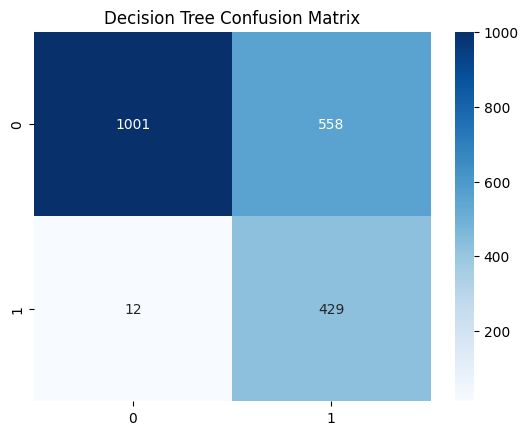

In [951]:
# Plot confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [959]:
# Define new data with the same features as your original dataset
new_data = pd.DataFrame({
    'age': [40, 25, 50],  # Example ages
    'number_of_site_visits': [8, 3, 6],  # Example number of site visits
    'number_of_emails_opened': [2, 1, 3],  # Example number of emails opened
    'number_of_clicks': [45, 15, 25],  # Example number of clicks
    'frequency_of_purchases': [3, 30, 2],  # Example frequency of purchases
    'recency': [25, 10, 15],  # Example recency
    'num_campaigns': [2, 1, 3],  # Example number of campaigns
    'num_responses': [1, 0, 2]  # Example number of responses
})

new_data


,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,frequency_of_purchases,recency,num_campaigns,num_responses
0,40,8,2,45,3,25,2,1
1,25,3,1,15,30,10,1,0
2,50,6,3,25,2,15,3,2


In [960]:
# Assuming 'pipeline' is your trained pipeline containing preprocessing and Decision Tree classifier
predictions = pipeline.predict(new_data)

# Print or use predictions as needed
print("Predictions:")
print(predictions)

Predictions:
[False  True False]
